In [1]:
# In this tutorial:
# I attempt decision tree using Scikit Learn
# Note that Decision Tree visualization via export_graphviz requires:
# 1. msi download via https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# 2. add graphviz to System PATH

In [2]:
tut_url = 'http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/'

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [4]:
# visualize decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## Import dataset

In [5]:
borig = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                    sep= ',', header= None)
borig.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [6]:
print(f'Dataset length: {len(borig)}')
print(f'Dataset shape: {borig.shape}')

Dataset length: 625
Dataset shape: (625, 5)


In [7]:
X = borig.values[:, 1:5]
Y = borig.values[:, 0]

print(X[:5])
print(Y[:5])

[[1 1 1 1]
 [1 1 1 2]
 [1 1 1 3]
 [1 1 1 4]
 [1 1 1 5]]
['B' 'R' 'R' 'R' 'R']


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=100)

## Decision Tree with criterion gini index

In [9]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100,
                                  max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

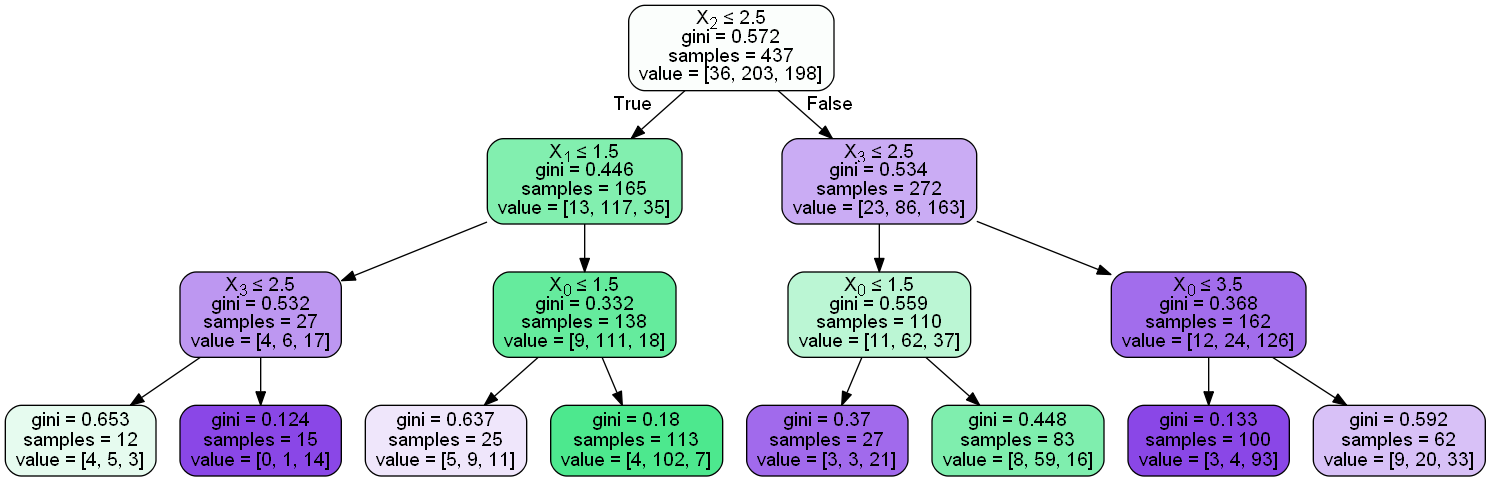

In [11]:
# gini visualization

dot_data = StringIO()

export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Decision Tree with criterion information gain

In [12]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100,
                                     max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

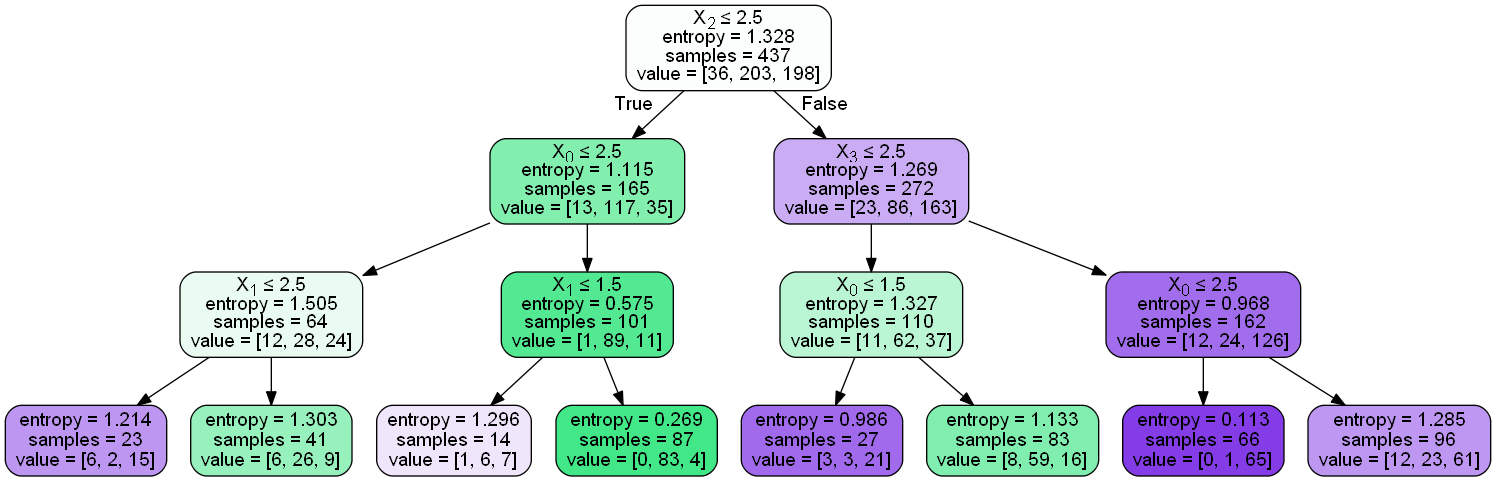

In [13]:
# entropy visualization

dot_data = StringIO()

export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Prediction

In [21]:
clf_gini.predict([[4,4,3,3]])

array(['R'], dtype=object)

In [22]:
Y_pred_gi = clf_gini.predict(X_test)
Y_pred_gi[:10]

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L'], dtype=object)

In [23]:
Y_pred_en = clf_entropy.predict(X_test)
Y_pred_en[:10]

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R'], dtype=object)

In [26]:
print(f'Gini accuracy is {accuracy_score(Y_test,Y_pred_gi)*100}')
print(f'Entropy accuracy is {accuracy_score(Y_test,Y_pred_en)*100}')

Gini accuracy is 73.40425531914893
Entropy accuracy is 70.74468085106383


In [27]:
# Tutorial complete